In [5]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import h5py
import astropy.constants as const

In [36]:
def read_hdf5_file_raw(file_path):
    with h5py.File(file_path, 'r') as f:
        r_over_R = np.array(f['/r_over_R'])
        c_s = np.array(f['/c_s']) * u.cm/u.s
        Gamma_1 = np.array(f['/Gamma_1'])
        T0 = np.array(f['/T']) * u.K
        rho0 = np.array(f['/rho']) * u.g/(u.cm**3)
        p0 = np.array(f['/p']) * u.dyn/(u.cm**2)
        
        r_over_R = np.flip(r_over_R)
        c_s = np.flip(c_s)
        Gamma_1 = np.flip(Gamma_1)
        T0 = np.flip(T0)
        rho0 = np.flip(rho0)
        p0 = np.flip(p0)

    return r_over_R, c_s, Gamma_1, T0, rho0, p0

r_over_R, c_s, Gamma_1, T0, rho0, p0 =\
    read_hdf5_file_raw("../../additional_files/solar_s.h5")

In terms of the unitless variable $r'=r/R_*$, which we will just call $r$ in the following, we have that the infidesimal volume of a shell is 

$$
dV = 4\pi R_*^3 r^2 dr
$$

and then get that the mass
$$
M(r) = \int_0^r dm = \int_0^r \rho(r) dV = 4\pi R_*^3 \int_0^r \rho(r) r^2 dr
$$

This gives us the gravitational acceleration (Newton)

$$
g(r) = \frac{GM(r)}{r^2 R_*^2} = \frac{4\pi R_* G}{r^2}\int_0^r \rho(r) r^2 dr.
$$

We approximate the integral with a Riemann sum

$$
g(r_{j}) = \frac{4\pi R_* G}{r_j^2}\sum _{i=0}^j \rho_i z_i^2 (z_i-z_{i-1})
$$

And we let $\rho(r=0)=0 \Rightarrow g(r=0)=0$, so we can let the sum go from $i=1$.

$$
g(r_j) = \frac{4\pi R_* G}{r_j^2}\sum _{i=1}^j \rho_i z_i^2 (z_i-z_{i-1})
$$

In [37]:
R_sun = 6.957e10 * u.cm
M_sun = 1.989e33 * u.gram
G = 6.6743e-8 * u.cm**3 /(u.gram * u.s * u.s)

nz = len(r_over_R)

In [47]:
g = np.zeros(nz) * u.cm / (u.s**2)
# we let g[0] = 0, from rho[0] = 0

for j in range(1, nz):
    integral = 0 * u.gram / (u.cm**3)
    for i in range(1, j):
        dr = r_over_R[i] - r_over_R[i-1]
        integral += rho0[i] * (r_over_R[i])**2 * dr
    
    g[j] = 4 * np.pi * R_sun * G /(r_over_R[j]**2) * integral

Text(0, 0.5, 'Gravitational acceleration [cm/s$^2$]')

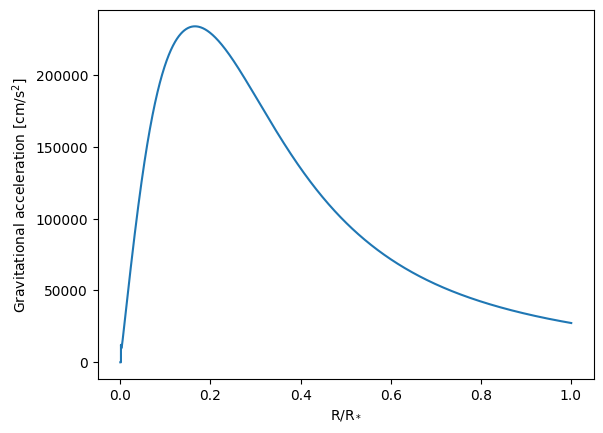

In [50]:
plt.plot(r_over_R, g)
plt.xlabel("R/R$_*$")
plt.ylabel("Gravitational acceleration [cm/s$^2$]")

In [51]:
g_sun = G * M_sun / (R_sun**2)

In [52]:
print("g_sun:{}".format(g_sun))
print("g[-1]:{}".format(g[-1]))

g_sun:27428.149001043374 cm / s2
g[-1]:27338.705501825472 cm / s2
